In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats 
from sklearn import metrics 
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings


In [3]:
warnings.filterwarnings("ignore")

In [4]:
os.chdir('C:\\Users\\yashi')

In [5]:
white_wine = pd.read_csv('white wine quality.csv')
white_wine['type'] = 'White'

In [6]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [7]:
red_wine = pd.read_csv('red wine quality.csv')
red_wine['type'] = 'Red'

In [8]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red


In [9]:
Type = [white_wine, red_wine]
wine = pd.concat(Type)
wine.reset_index(drop = True, inplace = True)

In [10]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,White
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,White
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,White
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red


In [11]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

There are 0 null values

In [12]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

### Univariate Numerical Analysis

In [14]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(),2)
    max1=round(data[x].max(),2)
    mean=round(data[x].mean(),2)
    var=round(data[x].var(),2)
    std=round(data[x].std(),2)
    range1=round(max1-min1,2)
    q1=round(data[x].quantile(.25),2)
    q2=round(data[x].quantile(.50),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(),2)
    kurt=round(data[x].kurt(),2)
    myvalue={"missing" : missing,"min" : min1,"max" : max1,"mean" : mean,"var" : var, "std" : std,"range" : range1,
             "q1" : q1,"q2" : q2,"q3" : q3,"skewness" : skew,"Kurtosis" : kurt}
    sns.histplot(data[x],kde=True)
    plt.show()
    sns.boxplot(data=data,y=data[x])
    plt.show()
    return myvalue

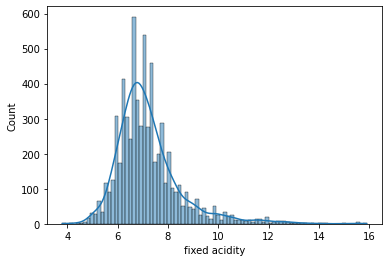

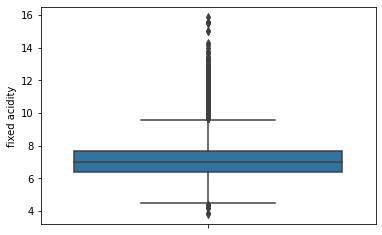

{'missing': 0,
 'min': 3.8,
 'max': 15.9,
 'mean': 7.22,
 'var': 1.68,
 'std': 1.3,
 'range': 12.1,
 'q1': 6.4,
 'q2': 7.0,
 'q3': 7.7,
 'skewness': 1.72,
 'Kurtosis': 5.06}

In [15]:
univariate_num(wine,'fixed acidity')

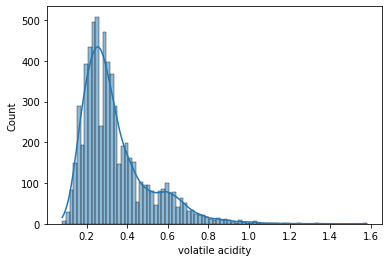

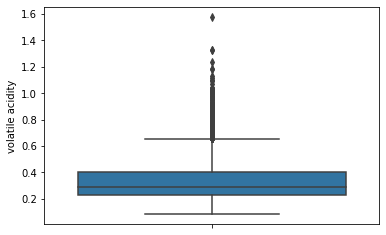

{'missing': 0,
 'min': 0.08,
 'max': 1.58,
 'mean': 0.34,
 'var': 0.03,
 'std': 0.16,
 'range': 1.5,
 'q1': 0.23,
 'q2': 0.29,
 'q3': 0.4,
 'skewness': 1.5,
 'Kurtosis': 2.83}

In [16]:
univariate_num(wine,'volatile acidity')

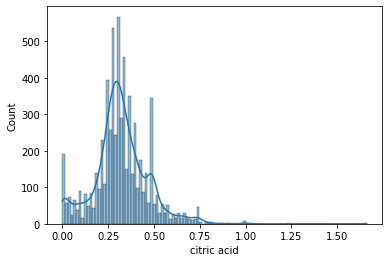

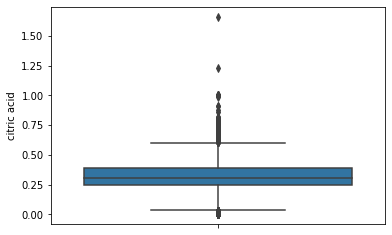

{'missing': 0,
 'min': 0.0,
 'max': 1.66,
 'mean': 0.32,
 'var': 0.02,
 'std': 0.15,
 'range': 1.66,
 'q1': 0.25,
 'q2': 0.31,
 'q3': 0.39,
 'skewness': 0.47,
 'Kurtosis': 2.4}

In [17]:
univariate_num(wine,'citric acid')

Data is normally Distributed and The median score of citric acid present in wine  is between 0 and 0.60, with the highest scores
being 1.60.

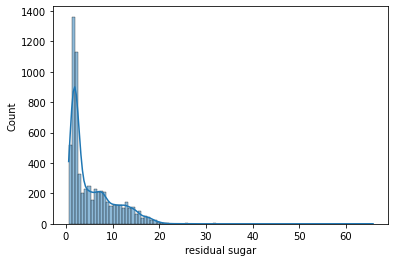

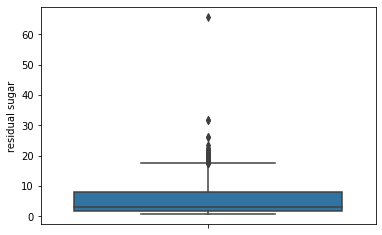

{'missing': 0,
 'min': 0.6,
 'max': 65.8,
 'mean': 5.44,
 'var': 22.64,
 'std': 4.76,
 'range': 65.2,
 'q1': 1.8,
 'q2': 3.0,
 'q3': 8.1,
 'skewness': 1.44,
 'Kurtosis': 4.36}

In [18]:
univariate_num(wine,'residual sugar')

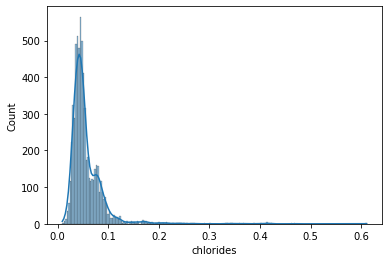

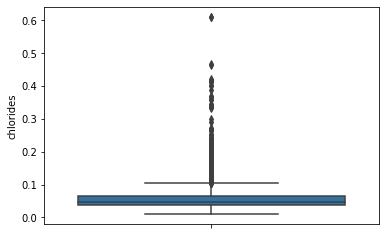

{'missing': 0,
 'min': 0.01,
 'max': 0.61,
 'mean': 0.06,
 'var': 0.0,
 'std': 0.04,
 'range': 0.6,
 'q1': 0.04,
 'q2': 0.05,
 'q3': 0.06,
 'skewness': 5.4,
 'Kurtosis': 50.9}

In [19]:
univariate_num(wine,'chlorides')

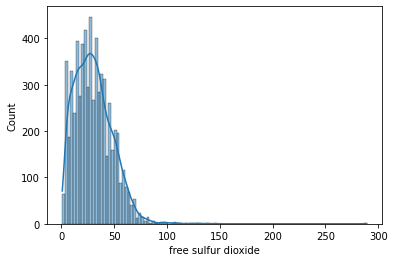

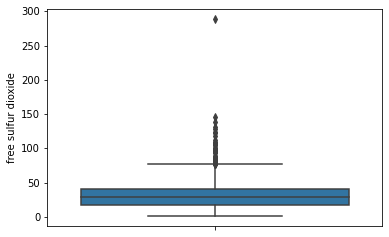

{'missing': 0,
 'min': 1.0,
 'max': 289.0,
 'mean': 30.53,
 'var': 315.04,
 'std': 17.75,
 'range': 288.0,
 'q1': 17.0,
 'q2': 29.0,
 'q3': 41.0,
 'skewness': 1.22,
 'Kurtosis': 7.91}

In [20]:
 univariate_num(wine,'free sulfur dioxide')

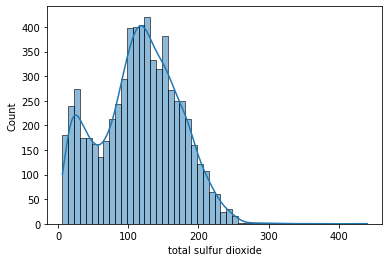

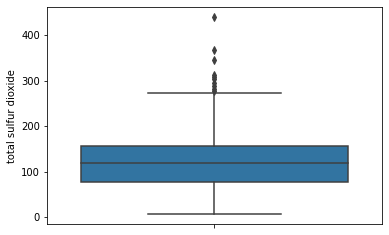

{'missing': 0,
 'min': 6.0,
 'max': 440.0,
 'mean': 115.74,
 'var': 3194.72,
 'std': 56.52,
 'range': 434.0,
 'q1': 77.0,
 'q2': 118.0,
 'q3': 156.0,
 'skewness': -0.0,
 'Kurtosis': -0.37}

In [21]:
univariate_num(wine,'total sulfur dioxide')

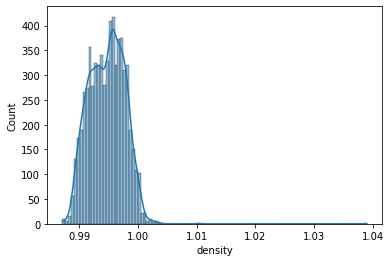

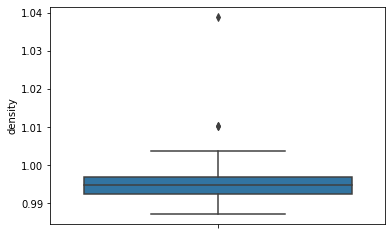

{'missing': 0,
 'min': 0.99,
 'max': 1.04,
 'mean': 0.99,
 'var': 0.0,
 'std': 0.0,
 'range': 0.05,
 'q1': 0.99,
 'q2': 0.99,
 'q3': 1.0,
 'skewness': 0.5,
 'Kurtosis': 6.61}

In [22]:
univariate_num(wine,'density')

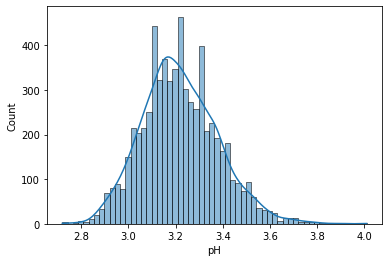

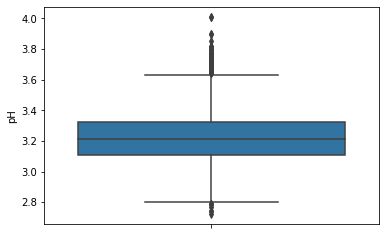

{'missing': 0,
 'min': 2.72,
 'max': 4.01,
 'mean': 3.22,
 'var': 0.03,
 'std': 0.16,
 'range': 1.29,
 'q1': 3.11,
 'q2': 3.21,
 'q3': 3.32,
 'skewness': 0.39,
 'Kurtosis': 0.37}

In [24]:
univariate_num(wine,'pH')

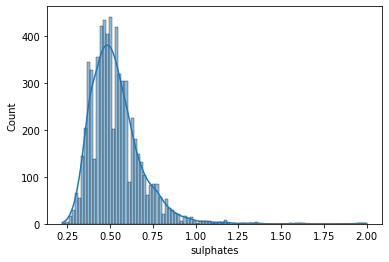

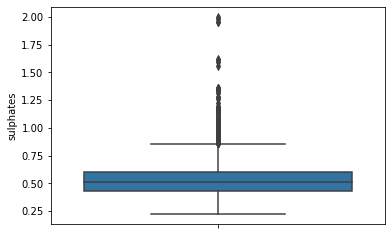

{'missing': 0,
 'min': 0.22,
 'max': 2.0,
 'mean': 0.53,
 'var': 0.02,
 'std': 0.15,
 'range': 1.78,
 'q1': 0.43,
 'q2': 0.51,
 'q3': 0.6,
 'skewness': 1.8,
 'Kurtosis': 8.65}

In [25]:
univariate_num(wine,'sulphates')

The median percentage/score of sulphate present in wine  is between 0.25 and 0.80, with the highest scores
being 2.

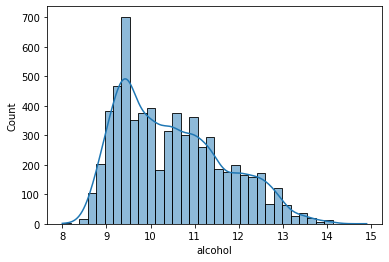

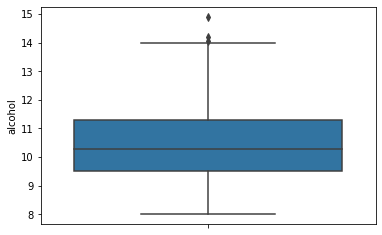

{'missing': 0,
 'min': 8.0,
 'max': 14.9,
 'mean': 10.49,
 'var': 1.42,
 'std': 1.19,
 'range': 6.9,
 'q1': 9.5,
 'q2': 10.3,
 'q3': 11.3,
 'skewness': 0.57,
 'Kurtosis': -0.53}

In [26]:
univariate_num(wine,'alcohol')

The median percentage/score of achohol present in wine  is between 8 and 14, with the highest scores
being 15.

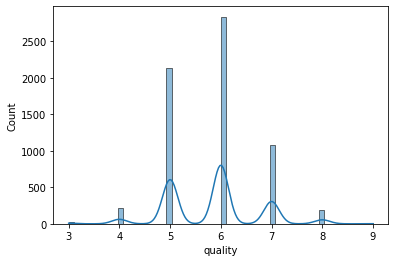

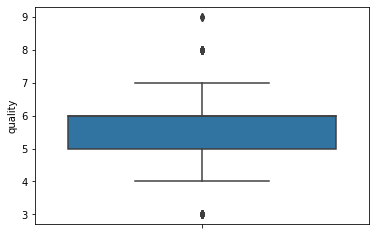

{'missing': 0,
 'min': 3,
 'max': 9,
 'mean': 5.82,
 'var': 0.76,
 'std': 0.87,
 'range': 6,
 'q1': 5.0,
 'q2': 6.0,
 'q3': 6.0,
 'skewness': 0.19,
 'Kurtosis': 0.23}

In [27]:
univariate_num(wine,'quality')

The median score of wine is between 4 and 7, with the highest scores
being 9 and 8. The lowest score is 3. It can be seen that average quality of wine is 5.82.

### Univariate Categorical Analysis

In [28]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={x:"Count"},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"Percentage"},inplace=True)
    f2["Percentage"]=(f2["Percentage"]*100).round(2).astype(str)+" %"
    ff=pd.concat([f1,f2],axis=1)
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique category : {unique_cnt}\n")
    print(f"Unique categories : \n{unique_cat}")
    print(f"Value count and %\n: {ff}")
    
    sns.countplot(data=data,x=x)
    plt.show()

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['White', 'Red']
Value count and %
:        Count Percentage
White   4898    75.39 %
Red     1599    24.61 %


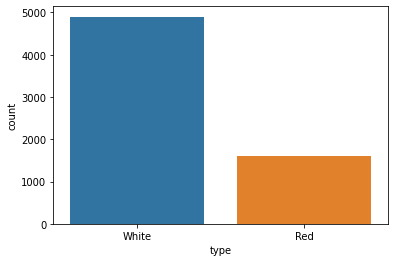

In [29]:
univariate_cat(wine,'type')

In the chart, it can be seen that majority of samples in the dataset is white wine, totaling just a little 
over three times the amount of white wine

### Checking Outliers using box plot and percentiles method

In [197]:
#for i in wine.columns:
#    sns.boxplot(data=wine, y=i)
#    plt.show()

In [30]:
wine.describe(percentiles=[.01,.02,.03, .04,.05,.25,.5,.75, .9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,5.10000,5.3000,5.5000,5.60000,5.7000,6.40000,7.00000,7.70000,8.8000,9.800000,10.0160,10.50000,11.100000,12.00000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.12000,0.1400,0.1500,0.15000,0.1600,0.23000,0.29000,0.40000,0.5900,0.670000,0.6950,0.73500,0.780000,0.88000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.00000,0.0000,0.0200,0.03000,0.0500,0.25000,0.31000,0.39000,0.4900,0.560000,0.5800,0.63000,0.670800,0.74000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,0.90000,1.0000,1.1000,1.10000,1.2000,1.80000,3.00000,8.10000,13.0000,15.000000,15.6000,16.40000,17.354000,18.20000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.02100,0.0240,0.0260,0.02700,0.0280,0.03800,0.04700,0.06500,0.0860,0.102000,0.1100,0.11912,0.147080,0.18616,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,4.00000,5.0000,5.0000,6.00000,6.0000,17.00000,29.00000,41.00000,54.0000,61.000000,63.0000,66.00000,69.000000,77.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,11.00000,13.0000,15.0000,17.00000,19.0000,77.00000,118.00000,156.00000,188.0000,206.000000,211.0000,216.00000,224.000000,238.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.98892,0.9893,0.9895,0.98968,0.9899,0.99234,0.99489,0.99699,0.9984,0.999392,0.9996,0.99980,1.000102,1.00060,1.03898
pH,6497.0,3.218501,0.160787,2.72000,2.89000,2.9200,2.9400,2.96000,2.9700,3.11000,3.21000,3.32000,3.4200,3.500000,3.5200,3.54000,3.580000,3.64000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.30000,0.3200,0.3300,0.34000,0.3500,0.43000,0.51000,0.60000,0.7200,0.790000,0.8200,0.85000,0.900000,0.99000,2.00000


There are outliers in every independent variable 

In [31]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

### OUTLIER TREATMENT

In [32]:
def outliers_perc(x):
    x=x.clip(upper=x.quantile(.99))
    return x 

In [33]:
var = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol' ]
df_out = wine[var]
df_out.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5


In [34]:
var = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol' ]
df_no_out = wine.drop(columns = var)
df_no_out.head(2)

,quality,type
0,6,White
1,6,White


In [35]:
df_out = df_out.apply(lambda x: outliers_perc(x))

In [36]:
df_wine = pd.concat([df_no_out, df_out], axis = 1)
df_wine.head(2)

,quality,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6,White,7.0,0.27,0.36,18.2,0.045,45.0,170.0,1.0006,3.0,0.45,8.8
1,6,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.3,0.49,9.5


### Ranking Quality Scores

In [37]:
group_names=['Low','Medium','High']
x = pd.cut(df_wine['quality'], 3, labels=group_names)
df_wine['quality'] = x
df_wine

,quality,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,Medium,White,7.0,0.270,0.36,18.2,0.045,45.0,170.0,1.00060,3.00,0.45,8.8
1,Medium,White,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,Medium,White,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,Medium,White,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,Medium,White,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,Low,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,Medium,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
6494,Medium,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,Low,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [38]:
df_wine['quality'].value_counts()

Medium    3915
Low       2384
High       198
Name: quality, dtype: int64

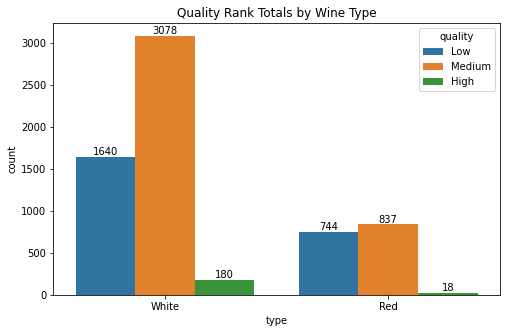

In [39]:
plt.figure(figsize=(8,5))
counts = sns.countplot(x = 'type', hue = 'quality', data = df_wine)
for container in counts.containers:
    counts.bar_label(container)
plt.title('Quality Rank Totals by Wine Type') 
plt.show()

### Transforming Categorical Features

In [40]:
quality = {"Low" : 0,"Medium": 1,"High" : 2}
df_wine["quality"] = df_wine["quality"].map(quality)
df_wine.head()


,quality,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,White,7.0,0.27,0.36,18.2,0.045,45.0,170.0,1.0006,3.00,0.45,8.8
1,1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [41]:
type_ = {"Red" : 0, "White": 1}
df_wine["type"] = df_wine["type"].map(type_)
df_wine.head()

,quality,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,1,7.0,0.27,0.36,18.2,0.045,45.0,170.0,1.0006,3.00,0.45,8.8
1,1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


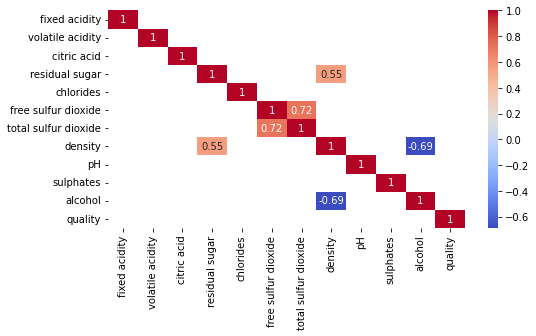

In [42]:
plt.figure(figsize=(8,4))
cr = wine.corr()
cr = cr[abs(cr)>.5]
sns.heatmap(cr, annot=True, cmap="coolwarm")
plt.show()

From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other. For Example,

   * Free sulphur dioxide and Total sulphor dioxide. 
   * Alchol and Density. 
   * Density and Quality.

### Split and Scale

This split will be used to predict quality.

In [43]:
X = df_wine.drop(['quality'],axis=1)
Y = df_wine['quality']

This split will be used to predict type.

In [44]:
X2 = wine.drop(['type'],axis=1)
Y2 = wine['type']

Standardization data

In [45]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(X)
X = pd.DataFrame(minmax_df, columns=X.columns)

In [46]:
minmax_df1 = scaler.fit_transform(X2)
X2 = pd.DataFrame(minmax_df1, columns = X2.columns)

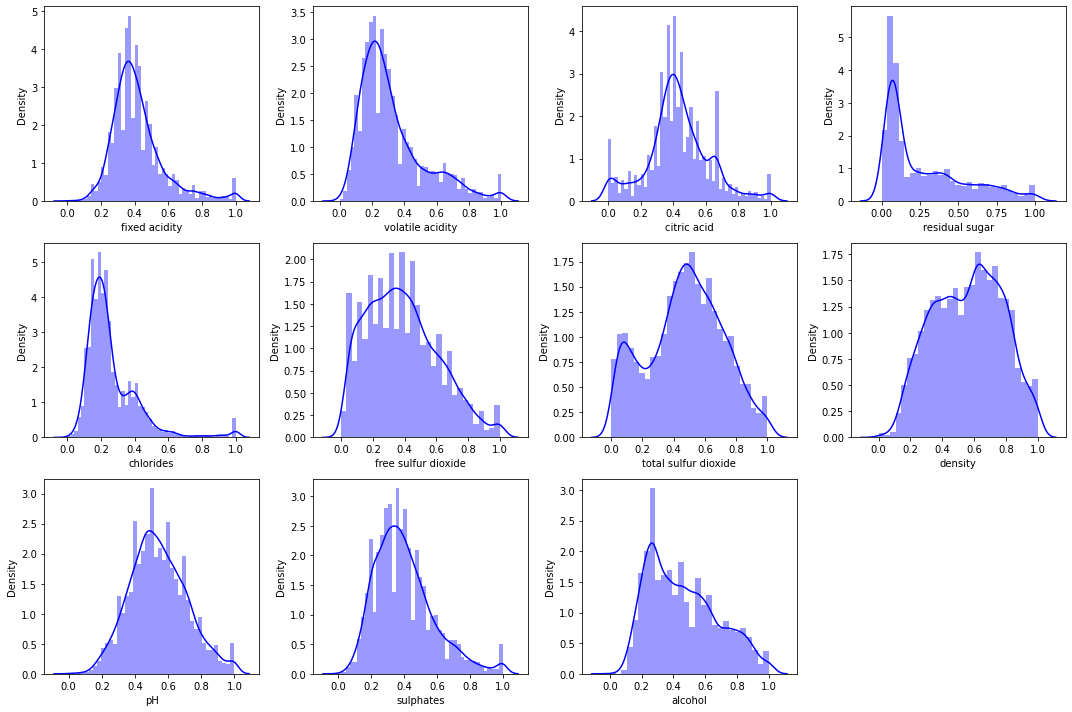

In [47]:
plt.figure(figsize = (15,10))
for i in range(1,12):
    plt.subplot(3,4,i)
    sns.distplot(X[X.columns[i]],color='blue')
    plt.tight_layout()

            Here we can see that all values for each feature falls between 0 and 1.

Now we will split the independent and dependent variables into training and test sets for our
models.

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=0) #Predictive Models for Wine Quality

In [49]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.2, random_state=0)  #Predictive Models for Wine Type

In [50]:
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (5197, 12)
The shape of X_test is: (1300, 12)
The shape of Y_train is: (5197,)
The shape of Y_test is: (1300,)


In [51]:
print("The shape of X_train is:", X2_train.shape)
print("The shape of X_test is:", X2_test.shape)
print("The shape of Y_train is:", Y2_train.shape)
print("The shape of Y_test is:", Y2_test.shape)

The shape of X_train is: (5197, 12)
The shape of X_test is: (1300, 12)
The shape of Y_train is: (5197,)
The shape of Y_test is: (1300,)


### Predictive Models for Wine Quality

### LOGISTIC REGRESSION MODEL

In [52]:
log_R = LogisticRegression()
log_R.fit(X_train,Y_train)
accuracy = log_R.score(X_test, Y_test)
print('Log Regression Accuracy:',(accuracy*100).round(2),'%')

Log Regression Accuracy: 72.0 %


Our Logisitic Regression model gave us a preliminary accuracy score of 72.0%, which is not so
good.

### Let's tune our model to see if we can improve on that number.

In [53]:
log_params = {'C':[0.01,0.1,1],
              'penalty':['l1','l2','elasticnet'],
              'solver':['liblinear','lbfgs','newton-cg', 'sag', 'saga']}
logreg_cv = GridSearchCV(log_R,log_params,cv=5)
logreg_cv.fit(X_train, Y_train)
print("Best Parameters :",logreg_cv.best_params_)
print("GridSearch Score :",(logreg_cv.best_score_*100).round(2),'%')

Best Parameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearch Score : 71.35 %


In [54]:
y_predict=logreg_cv.best_estimator_.predict(X_test)
print("Tuned Logistic Regression Model Accuracy:",
     (accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned Logistic Regression Model Accuracy: 72.38 %


In [194]:
#conf_train=metrics.confusion_matrix(Y_test,y_predict)
#pd.DataFrame(conf_train, columns=['Low','Medium','High'], index=['Low','Medium','High'])

### SUPPORT VECTOR MACHINE MODEL

In [147]:
svm = SVC()
svm.fit(X_train,Y_train)
accuracy = svm.score(X_test, Y_test)
print('Support Vector Accuracy:',(accuracy*100).round(2),'%')

Support Vector Accuracy: 74.69 %


Our Support Vector model gave us a preliminary accuracy score of 74.69%, which is slightly better
than the Log Regression model but still low. 

### Let's tune our model to see if we can improve on that number. 

In [148]:
svm_params = {"kernel": ['linear','poly','rbf'],
         "degree": [2,3,4],
         "gamma":[0.1,1,.001],
         "C":[0.001,0.01,0.1,1,10,100]}

svm_cv = GridSearchCV(svm,svm_params,cv=5)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [2, 3, 4], 'gamma': [0.1, 1, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']})

In [149]:
print("Best Parameters :",svm_cv.best_params_)
print("GridSearch Score:",(svm_cv.best_score_*100).round(2),'%')

Best Parameters : {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
GridSearch Score: 74.54 %


In [164]:
y_predict=svm_cv.best_estimator_.predict(X_test)
print("Tuned SVM Model Accuracy:",
     (accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned SVM Model Accuracy: 74.0 %


### DECISION TREE MODEL

In [153]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
accuracy = tree.score(X_test, Y_test)
print('Decision Tree Accuracy:',(accuracy*100).round(2),'%')

Decision Tree Accuracy: 73.23 %


### Let's tune our model to see if we can improve on that number.

In [154]:
tree_params = {'criterion':['gini','entropy','log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': ['None',2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15],
 'max_features': ['auto', 'sqrt','log2']}
tree_cv = GridSearchCV(tree,tree_params,cv=5)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': ['None', 2, 4, 6, 8, 10, 12, 14, 16, 18,
                                       20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20],
                         'splitter': ['best', 'random']})

In [165]:
print("Best Parameters :",tree_cv.best_params_)
print("GridSearch Score :",(tree_cv.best_score_*100).round(2),'%')

Best Parameters : {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
GridSearch Score : 72.97 %


In [166]:
y_predict = tree_cv.best_estimator_.predict(X_test)
print("Tuned Decision Tree Model Accuracy:",
 (accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned Decision Tree Model Accuracy: 73.31 %


### K-NEAREST NEIGHBOUR MODEL

In [55]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)
accuracy = KNN.score(X_test, Y_test)
print('K-Neighbors Model Accuracy:',(accuracy*100).round(2),'%')

K-Neighbors Model Accuracy: 72.62 %


### Let's tune our model to see if we can improve on that number.

In [56]:
knn_params = {'n_neighbors': list(range(1,50)),
 'weights':['uniform','distance'],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'p': [1,2]}
knn_cv = GridSearchCV(KNN,knn_params,cv=10)
knn_cv.fit(X_train, Y_train)
print("Best Parameters :",knn_cv.best_params_)
print("GridSearch Score :",(knn_cv.best_score_*100).round(2),'%')


KeyboardInterrupt



In [167]:
y_predict=knn_cv.best_estimator_.predict(X_test)
print("Tuned K-Neighbors model accuracy:",
     ( accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned K-Neighbors model accuracy: 80.08 %


### COMPARING RESULTS OF DIFFERENT MODELS

In [168]:
mods = {'LogReg':[log_R.score(X_test, Y_test),logreg_cv.score(X_test, Y_test)],'SVM':[svm.score(X_test, Y_test),svm_cv.score(X_test, Y_test)],'DeccisionTree':[tree.score(X_test, Y_test),tree_cv.score(X_test, Y_test)],'KNN':[KNN.score(X_test, Y_test),knn_cv.score(X_test, Y_test)]}
scores = pd.DataFrame.from_dict(mods,orient='index', columns=['Initial Model','Tuned Model'])
scores  

,Initial Model,Tuned Model
LogReg,0.720000,0.724615
SVM,0.746923,0.740000
DeccisionTree,0.732308,0.733077
KNN,0.726154,0.800769


### Between the four models, the best one to predict wine quality was the K-Nearest-Neigbors classifier after tuning.


<AxesSubplot:>

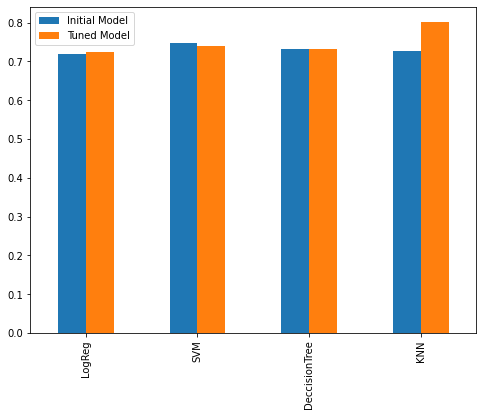

In [169]:
scores.plot.bar(figsize=(8,6))

### Predictive Models for Wine Type

### Logistic Regression Model

In [57]:
log_R = LogisticRegression()
log_R.fit(X2_train,Y2_train)
logR_accuracy = log_R.score(X2_test, Y2_test)
print('Logistic Regression Accuracy:',(logR_accuracy*100).round(2),'%')

Logistic Regression Accuracy: 98.46 %


### Confusion Metrix

In [183]:
y_predict = log_R.predict(X2_test)
conf_train=metrics.confusion_matrix(Y2_test,y_predict)
pd.DataFrame(conf_train, columns=['RED','WINE'], index=['RED','WINE'])

,RED,WINE
RED,307,18
WINE,2,973


Summary :- Here we can see that our Logistic Regression model gave us a fantastic score of 98.46%, accurately
predicting 1,286 samples out of 1,300. With a score like this, there is no need to tune our model
or to even train any other ones.

### Support Vector Machine Model

In [171]:
svm = SVC()
svm.fit(X2_train,Y2_train)
svm_accuracy = svm.score(X2_test, Y2_test)
print('Support Vector Accuracy:',(svm_accuracy*100).round(2),'%')

Support Vector Accuracy: 99.46 %


### Confusion Metrix

In [184]:
y_predict = svm.predict(X2_test)
conf_train=metrics.confusion_matrix(Y2_test,y_predict)
pd.DataFrame(conf_train, columns=['RED','WINE'], index=['RED','WINE'])

,RED,WINE
RED,319,6
WINE,1,974


Summary:- Here we can see that our Support Vector Machine model gave us a Perefect score of 99.46%, accurately
predicting 1,293 samples out of 1,300. With a score like this, there is no need to tune our model


### Decision Tree

In [172]:
tree = DecisionTreeClassifier()
tree.fit(X2_train,Y2_train)
tree_accuracy = tree.score(X2_test, Y2_test)
print('Decision Tree Accuracy:',(tree_accuracy*100).round(2),'%')

Decision Tree Accuracy: 98.54 %


### Confusion Metrix

In [185]:
y_predict = tree.predict(X2_test)
conf_train=metrics.confusion_matrix(Y2_test,y_predict)
pd.DataFrame(conf_train, columns=['RED','WINE'], index=['RED','WINE'])

,RED,WINE
RED,317,8
WINE,11,964


Summary:- Here we can see that our Decision Tree model gave us a Again fantastic score of 98.54%, accurately predicting 1,281 samples out of 1,300. With a score like this, there is no need to tune our model

### K-Nearest-Neighbors

In [173]:
KNN = KNeighborsClassifier()
KNN.fit(X2_train,Y2_train)
KNN_accuracy = KNN.score(X2_test, Y2_test)
print('KNN Model Accuracy:',(KNN_accuracy*100).round(2),'%')

KNN Model Accuracy: 99.15 %


### Confusion Metrix

In [190]:
#y_predict = KNN.predict(X2_test)
#conf_train=metrics.confusion_matrix(Y2_test,y_predict)
#pd.DataFrame(conf_train, columns=['RED','WINE'], index=['RED','WINE'])

### COMPARING RESULTS OF DIFFERENT MODELS

In [174]:
mods = {'LogReg':[(logR_accuracy*100)],'SVM':[(svm_accuracy*100)],'D_Tree':[(tree_accuracy*100)], 'KNN':[(KNN_accuracy*100)]}
types = pd.DataFrame.from_dict(mods,orient='index', columns=['Accuracy'])
types

,Accuracy
LogReg,98.461538
SVM,99.461538
D_Tree,98.538462
KNN,99.153846


The best model for predicting wine types is our Support Vector Classifier with a score of 99.46 %

<AxesSubplot:>

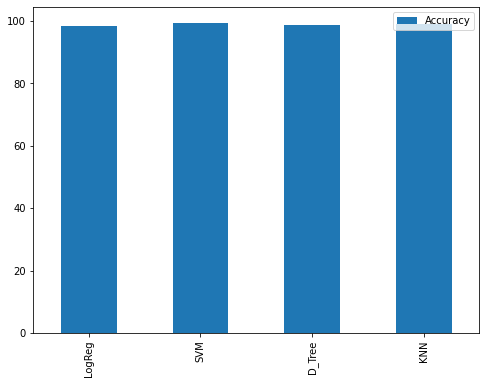

In [195]:
types.plot.bar(figsize=(8,6))